<a href="https://colab.research.google.com/github/TastyButSadly/Notebooks/blob/main/olymp_students_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Статус студента"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score

In [2]:
train_data = pd.read_csv("./students_train.csv", index_col='ID')
test_data = pd.read_csv("./students_test.csv", index_col='ID')
# test_answer = pd.read_csv("./students_answer.csv")

train_data.head()

FileNotFoundError: [Errno 2] No such file or directory: './students_train.csv'

In [ ]:
train_data.dtypes

,0
Код_группы,int64
Год_Поступления,int64
Пол,object
Основания,object
Изучаемый_Язык,object
Дата_Рождения,object
Уч_Заведение,object
Где_Находится_УЗ,object
Год_Окончания_УЗ,float64
Пособие,float64


In [ ]:
train_data.select_dtypes(include=['float64', 'int64'])

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
ID,,,,,,,,,,,,,
0,20018,2016,2016.0,0.0,0.0,1,1.0,0.0,1.0,0.0,26.0,45.0,1
1,20846,2016,2016.0,0.0,1.0,1,1.0,0.0,0.0,0.0,34.0,57.0,0
2,14762,2013,2013.0,NaN,0.0,0,0.0,0.0,0.0,NaN,25.0,43.0,0
3,17815,2015,2014.0,0.0,0.0,1,1.0,0.0,0.0,0.0,25.0,44.0,1
4,17011,2014,2014.0,0.0,0.0,0,0.0,0.0,0.0,0.0,30.0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,17890,2015,2010.0,0.0,0.0,0,0.0,0.0,0.0,0.0,26.0,85.0,1
11466,19795,2015,2015.0,0.0,1.0,0,0.0,0.0,1.0,0.0,24.0,43.0,1
11467,17040,2014,2007.0,0.0,0.0,0,0.0,0.0,0.0,0.0,26.0,44.0,1


In [ ]:
test_data['Код_группы'].value_counts()

,count
Код_группы,
11863,6
21742,5
20690,5
17110,5
15143,5
...,...
20360,1
11819,1
19971,1


<Axes: ylabel='ID'>

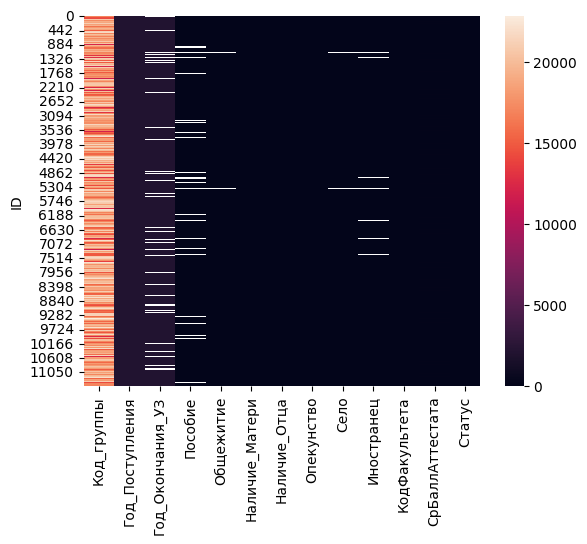

In [ ]:
sns.heatmap(train_data.select_dtypes(include=['float64', 'int64']))

- ID — уникальный идентификатор студента;
- Код_группы — идентификатор группы студента;
- Год_Поступления — год поступления абитуриента;
- Пол — пол абитуриента;
- Основания — основания поступления абитуриента;
- Изучаемый_Язык — иностранный язык, который изучался абитуриентом;
- Дата_Рождения — дата рождения студента;
- Уч_Заведение — наименование учебного заведения;
- Где_Находится_УЗ — локация учебного заведения;
- Год_Окончания_УЗ — год окончания учебного заведения;
- Пособие — получает ли абитуриент пособия;
- Страна_ПП — страна постоянного проживания;
- Регион_ПП — регион постоянного проживания;
- Город_ПП — город постоянного проживания;
- Общежитие — требуется ли общежитие абитуриенту.;
- Наличие_Матери — поле, показывающие наличие матери;
- Наличие_Отца — поле, показывающие наличие отца;
- Страна_Родители — страна постоянного проживания родителей;
- Опекунство — является ли абитуриент опекаемым;
- Село — проживает ли абитуриент в сельской местности;
- Иностранец — является ли абитуриент иностранным студентом;
- КодФакультета — идентификатор факультета;
- СрБаллАттестата — средний балл аттестата или средний балл ЕГЭ;
- Статус (целевая переменная): статус студента.	1, если студент отчислился, не закончив обучение, 0, если спешно закончил обучение.

In [ ]:
train_data.columns

Index(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение', 'Где_Находится_УЗ',
       'Год_Окончания_УЗ', 'Пособие', 'Страна_ПП', 'Регион_ПП', 'Город_ПП',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Страна_Родители',
       'Опекунство', 'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата',
       'Статус'],
      dtype='object')

In [ ]:
train_data.describe()

,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,11470.000000,11470.000000,11470.000000,10332.000000,10595.0,11398.000000,11470.000000,11470.000000,11470.000000,11398.000000,11193.000000,11470.000000,11470.000000,11470.000000
mean,5734.500000,18163.195292,2014.890671,2013.768777,0.0,0.218108,0.507585,0.505580,0.000349,0.229777,0.067900,32.459895,72.539238,0.363034
std,3311.248128,2484.483394,2.657686,4.207044,0.0,0.412980,0.499964,0.499991,0.018672,0.420708,0.251585,8.446696,252.233322,0.480895
min,0.000000,11550.000000,2001.000000,1974.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000
25%,2867.250000,16875.000000,2013.000000,2013.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,47.000000,0.000000
50%,5734.500000,18442.000000,2015.000000,2015.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,61.000000,0.000000
75%,8601.750000,20086.000000,2016.000000,2016.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,76.000000,1.000000
max,11469.000000,22824.000000,2212.000000,2020.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,5000.000000,1.000000


In [ ]:
train_data.shape

(11470, 24)

In [ ]:
train_data.dtypes

,0
ID,int64
Код_группы,int64
Год_Поступления,int64
Пол,object
Основания,object
Изучаемый_Язык,object
Дата_Рождения,object
Уч_Заведение,object
Где_Находится_УЗ,object
Год_Окончания_УЗ,float64


In [ ]:
train_data.isna().sum()

,0
ID,0
Код_группы,0
Год_Поступления,0
Пол,6
Основания,0
Изучаемый_Язык,726
Дата_Рождения,0
Уч_Заведение,1089
Где_Находится_УЗ,1207
Год_Окончания_УЗ,1138


In [ ]:
# train_data["Год_Поступления"] = train_data["Год_Поступления"] - train_data["Год_Окончания_УЗ"]

In [ ]:
train_data = train_data.drop(columns=['Пособие', 'Опекунство', 'Иностранец', 'Год_Окончания_УЗ'])
test_data = test_data.drop(columns=['Пособие', 'Опекунство', 'Иностранец', 'Год_Окончания_УЗ'])

Заполним пропуски:

In [ ]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [ ]:
train_data.dtypes[train_data.dtypes == "object"].index.values

array(['Пол', 'Основания', 'Изучаемый_Язык', 'Дата_Рождения',
       'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП',
       'Город_ПП', 'Страна_Родители'], dtype=object)

категориальные признаки:

In [ ]:
cat_data = train_data.dtypes[train_data.dtypes == "object"].index.values

In [ ]:
X_train = train_data.drop(columns=cat_data)
X_train = X_train.drop(columns=['Статус'])
y_train = train_data[["Статус"]]

X_test = test_data.drop(columns=cat_data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

Обучение

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

 предсказания:

In [ ]:
val_pred = clf.predict(X_val)
f1_score(y_val, val_pred, zero_division = 0)

0.7123287671232876

In [ ]:
test_pred = clf.predict(X_test)
# f1_score(test_answer['Статус'], test_pred, zero_division = 0)

submit

In [ ]:
test_answer

,ID,Статус
0,11470,0
1,11471,1
2,11472,1
3,11473,0
4,11474,0
...,...,...
1495,12965,1
1496,12966,1
1497,12967,1
1498,12968,0


In [ ]:
test_answer['Статус'] = test_pred
test_answer.to_csv('students_submission.csv', index=None)